In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings('ignore')

In [2]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


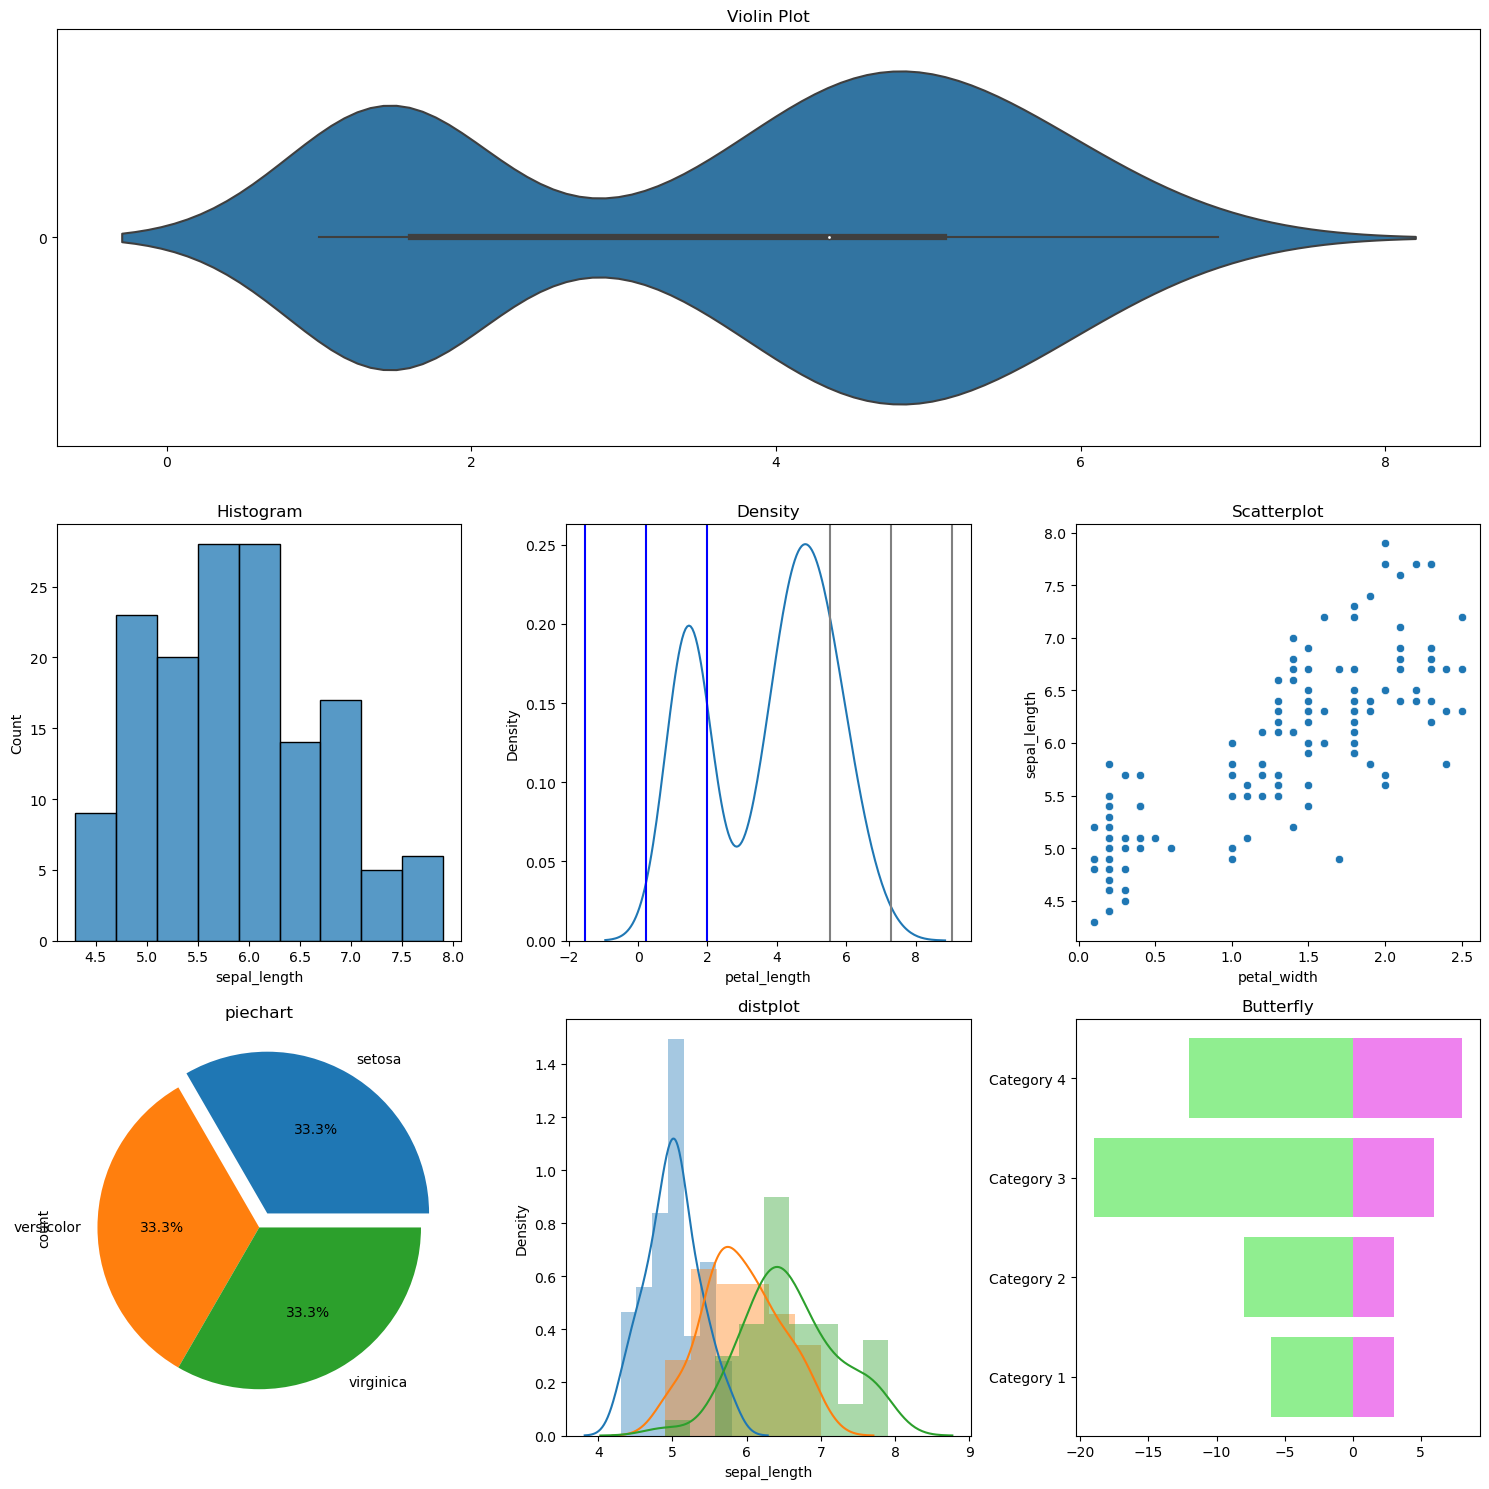

In [7]:
fig, ax = plt.subplots(3,3, figsize=(15, 15))
g = gridspec.GridSpec(3, 3)

# Violin plot
a = plt.subplot(g[0, :])
sns.violinplot(iris['petal_length'], orient='h', ax=a)
a.set_title('Violin Plot')

# Histogram
b = plt.subplot(g[1, 0])
sns.histplot(iris['sepal_length'], ax=b)
b.set_title('Histogram')

# Density plot
c = plt.subplot(g[1, 1])
sns.kdeplot(iris['petal_length'], ax=c)
mean = iris['petal_length'].mean()
std_dev = iris['petal_length'].std()
for i in range(1, 4):
    plt.axvline(mean + i*std_dev, color='gray')
    plt.axvline(mean - i*std_dev, color='blue')
c.set_title('Density')

# Scatter plot
d = plt.subplot(g[1, 2])
sns.scatterplot(data=iris, x='petal_width', y='sepal_length', ax=d)
d.set_title('Scatterplot')

# Exploded pie plot
e = plt.subplot(g[2, 0])
iris['species'].value_counts().plot.pie(autopct='%1.1f%%', explode=[0.1, 0, 0], ax=e)
e.set_title('piechart')

# Dist Plot
f = plt.subplot(g[2, 1])
sns.distplot(iris[iris['species'] == 'setosa']['sepal_length'], ax=f, label='setosa')
sns.distplot(iris[iris['species'] == 'versicolor']['sepal_length'], ax=f, label='versicolor')
sns.distplot(iris[iris['species'] == 'virginica']['sepal_length'], ax=f, label='virginica')
f.set_title('distplot')

# Butterfly chart
id = ['Category 1', 'Category 2', 'Category 3', 'Category 4']
pos = np.random.randint(1,20,4)
neg = np.random.randint(-20,-1,4)
g = plt.subplot(g[2, 2])
g.barh(id, pos, color='violet')
g.barh(id, neg, color='lightgreen')
g.set_title('Butterfly')

plt.tight_layout()
plt.show()